In [1]:
import sklearn
import numpy as np
import pickle as pkl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from funcs.utils import *
from funcs.explain import *
import shap
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

from funcs.DIMV import DIMVImputation
from funcs.miss_forest import mf

missing_rate = 0.4
nruns = 10
ouput_name = 'XGBRegressor_liver_rate04'  


data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/liver-disorders/bupa.data',
                  sep = ",", header = None)
print(data.head())
data.colums = str(data.columns)
X,y = data.iloc[:, [x for x in range(data.shape[1]) if x != 6]].astype(np.float32),data.iloc[:,-1]
G = len(np.unique(y))
from sklearn.preprocessing import LabelEncoder
le2 = LabelEncoder()
y = le2.fit_transform(y)
for g in range(G):
  print(sum(y==g))

X.shape

C:\Users\foxku\.conda\envs\tf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Instructions for updating:
non-resource variables are not supported in the long term
    0   1   2   3   4    5  6
0  85  92  45  27  31  0.0  1
1  85  64  59  32  23  0.0  2
2  86  54  33  16  54  0.0  2
3  91  78  34  24  36  0.0  2
4  87  70  12  28  10  0.0  2
145
200


(345, 6)

In [2]:
def get_split():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    
    scaler = StandardScaler()
    scaler.fit(X_train)
    X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
    X_test = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

    y_train, y_test = y_train.reshape((-1,1)), y_test.reshape((-1,1))
    encoder = LabelEncoder()
    encoder.fit(y_train)
    y_train = pd.DataFrame(encoder.transform(y_train))
    y_test = pd.DataFrame(encoder.transform(y_test))    
    X_train_star = generate_missing_data(X_train, rate=missing_rate)
    X_test_star = generate_missing_data(X_test, rate=missing_rate) 
    return X_train, X_train_star, y_train, X_test, X_test_star, y_test

chosen_model = xgboost.XGBClassifier(n_estimators=100, max_depth=2)

# Generate missing data, impute, and use SHAP to explain

In [3]:
results = []
for i in range(nruns):
    X_train, X_train_star, y_train, X_test, X_test_star, y_test = get_split()
    print('iteration:',i)
    results.append(one_run(X_train, X_train_star, y_train, X_test, X_test_star, y_test, chosen_model, get_spearrman = False))

C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 0


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 51.33it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 50.16it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 43.31it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 47.10it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 42.84it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 50.06it/s]


Validation result: best alpha 0.1, best score 0.8722099049476296, scores {0.0: 0.8776822949965589, 0.01: 0.8766219583297358, 0.1: 0.8722099049476296, 1.0: 0.9021860435717228, 10.0: 0.9958569173554428, 100.0: 1.0245612339354742}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 205.57it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 78.70it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.17it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.92it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 55.77it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 35.87it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.30it/s]


Validation result: best alpha 0.1, best score 0.8722099049476296, scores {0.0: 0.8776822949965588, 0.01: 0.8766219583297358, 0.1: 0.8722099049476296, 1.0: 0.9021860435717228, 10.0: 0.9958569173554428, 100.0: 1.0245612339354742}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 334.25it/s]


loss 0.18110895
loss 0.10535434
loss 0.07968782
loss 0.07661625
loss 0.075859696
loss 0.081717044
loss 0.0754414
loss 0.07939334
loss 0.081551485
loss 0.08523339
number of runs used by missForest: 10
loss: 0.08523339
loss 0.19110422
loss 0.09055734
loss 0.073638454
loss 0.07066863
loss 0.05950009
loss 0.057633027
loss 0.06285425
loss 0.061022688
loss 0.0656484
loss 0.07608323
number of runs used by missForest: 10
loss: 0.07608323


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 193.91it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 1


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 32.82it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 23.73it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 26.16it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39.45it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 21.21it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 55.29it/s]


Validation result: best alpha 0.1, best score 0.862401221013006, scores {0.0: 0.8636734041382844, 0.01: 0.8633940429367046, 0.1: 0.862401221013006, 1.0: 0.8817921490530789, 10.0: 0.9432345554817325, 100.0: 0.9630580546823668}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 91.65it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 25.63it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 29.54it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 35.23it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 25.42it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 22.05it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.07it/s]


Validation result: best alpha 0.1, best score 0.862401221013006, scores {0.0: 0.8636734041382844, 0.01: 0.8633940429367049, 0.1: 0.862401221013006, 1.0: 0.8817921490530789, 10.0: 0.9432345554817326, 100.0: 0.9630580546823668}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 190.81it/s]


loss 0.16744578
loss 0.13577853
loss 0.100769445
loss 0.107014
loss 0.11335825
loss 0.10553896
loss 0.10498552
loss 0.1137329
loss 0.10760511
loss 0.10685343
number of runs used by missForest: 10
loss: 0.10685343
loss 0.15690672
loss 0.12934585
loss 0.106859036
loss 0.111561835
loss 0.10680686
loss 0.118952915
loss 0.121930316
loss 0.11924344
loss 0.10309751
loss 0.10834503
number of runs used by missForest: 10
loss: 0.10834503


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 569.38it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 2


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 43.38it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 57.35it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 50.88it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 51.02it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 42.26it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 62.21it/s]


Validation result: best alpha 0.0, best score 0.8385665255886617, scores {0.0: 0.8385665255886617, 0.01: 0.8387494389497903, 0.1: 0.8412731971917872, 1.0: 0.8800586174615177, 10.0: 0.9761475410948205, 100.0: 1.006197713073907}
Value alpha used in for transforming is: 0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 217.32it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 73.20it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 75.82it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 97.82it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 99.06it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 97.15it/s]


Running Cross Validation, alpha=100.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 103.00it/s]


Validation result: best alpha 0.0, best score 0.8385665255886617, scores {0.0: 0.8385665255886617, 0.01: 0.8387494389497901, 0.1: 0.8412731971917872, 1.0: 0.8800586174615177, 10.0: 0.9761475410948205, 100.0: 1.006197713073907}
Value alpha used in for transforming is: 0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 567.33it/s]


loss 0.13592556
loss 0.086432464
loss 0.06405523
loss 0.06526548
loss 0.07217522
loss 0.07300672
loss 0.06973933
loss 0.06702051
loss 0.07008331
loss 0.07453243
number of runs used by missForest: 10
loss: 0.07453243
loss 0.14015055
loss 0.083001494
loss 0.083307564
loss 0.08743979
loss 0.09119046
loss 0.097356655
loss 0.093238264
loss 0.08961062
loss 0.09412546
loss 0.09172665
number of runs used by missForest: 10
loss: 0.09172665


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 331.03it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 3


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 57.67it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 56.17it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 50.03it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 43.34it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.81it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 23.15it/s]


Validation result: best alpha 0.01, best score 0.8681934418578794, scores {0.0: 0.8682559249740719, 0.01: 0.8681934418578794, 0.1: 0.8687590618741007, 1.0: 0.892574874597072, 10.0: 0.959646612917006, 100.0: 0.9816232072314884}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 55.36it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 34.22it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 24.97it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 22.47it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 25.88it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.70it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39.49it/s]


Validation result: best alpha 0.01, best score 0.8681934418578794, scores {0.0: 0.8682559249740719, 0.01: 0.8681934418578794, 0.1: 0.8687590618741007, 1.0: 0.892574874597072, 10.0: 0.9596466129170061, 100.0: 0.9816232072314884}
Value alpha used in for transforming is: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 119.69it/s]


loss 0.17176883
loss 0.09890621
loss 0.071163274
loss 0.066336244
loss 0.061247673
loss 0.061354995
loss 0.067568935
loss 0.07264485
loss 0.07479461
loss 0.085669
number of runs used by missForest: 10
loss: 0.085669
loss 0.17965892
loss 0.10378249
loss 0.0795072
loss 0.07997168
loss 0.07195053
loss 0.068080604
loss 0.06488836
loss 0.06639928
loss 0.0686764
loss 0.07422883
number of runs used by missForest: 10
loss: 0.07422883


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 227.99it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 4


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.49it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 92.31it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 93.11it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 89.20it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 93.18it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 81.97it/s]


Validation result: best alpha 0.1, best score 0.9304706640954513, scores {0.0: 0.9335382179507125, 0.01: 0.9330492159461637, 0.1: 0.9304706640954513, 1.0: 0.9443925402176182, 10.0: 0.9995496763352404, 100.0: 1.0172252432599138}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 130.43it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 61.04it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 54.21it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 74.14it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.59it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.20it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 26.97it/s]


Validation result: best alpha 0.1, best score 0.9304706640954513, scores {0.0: 0.9335382179507125, 0.01: 0.9330492159461637, 0.1: 0.9304706640954513, 1.0: 0.9443925402176182, 10.0: 0.9995496763352404, 100.0: 1.0172252432599138}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 258.69it/s]


loss 0.18892314
loss 0.12866655
loss 0.116957754
loss 0.12953644
loss 0.12970234
loss 0.13163717
loss 0.13373066
loss 0.13862151
loss 0.13254213
loss 0.1443714
number of runs used by missForest: 10
loss: 0.1443714
loss 0.19633517
loss 0.1364972
loss 0.11777737
loss 0.11415389
loss 0.10491885
loss 0.11698397
loss 0.12086874
loss 0.110106766
loss 0.087917894
loss 0.08839292
number of runs used by missForest: 10
loss: 0.08839292


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 214.99it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 5


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 63.56it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 27.86it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30.23it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.86it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 59.09it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 57.98it/s]


Validation result: best alpha 0.1, best score 0.8812419274533753, scores {0.0: 0.8820844497128908, 0.01: 0.8818920915836131, 0.1: 0.8812419274533753, 1.0: 0.8964301868682779, 10.0: 0.9542782363591058, 100.0: 0.9756083043501181}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 171.43it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 53.12it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 79.71it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 81.02it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 75.46it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 81.07it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 66.71it/s]


Validation result: best alpha 0.1, best score 0.8812419274533752, scores {0.0: 0.8820844497128908, 0.01: 0.8818920915836131, 0.1: 0.8812419274533752, 1.0: 0.8964301868682779, 10.0: 0.9542782363591059, 100.0: 0.9756083043501181}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 461.55it/s]


loss 0.22038297
loss 0.1494976
loss 0.116447315
loss 0.1119057
loss 0.11971115
loss 0.12630475
loss 0.14721404
loss 0.16336942
loss 0.15364434
loss 0.15434782
number of runs used by missForest: 10
loss: 0.15434782
loss 0.20736514
loss 0.13346621
loss 0.11743714
loss 0.12219152
loss 0.12906669
loss 0.13962902
loss 0.14640358
loss 0.13692644
loss 0.13598782
loss 0.131551
number of runs used by missForest: 10
loss: 0.131551


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 234.78it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 6


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.70it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 36.55it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 47.64it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 55.87it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 47.38it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 54.22it/s]


Validation result: best alpha 0.1, best score 0.8919612236601526, scores {0.0: 0.9110222854256369, 0.01: 0.906969438730462, 0.1: 0.8919612236601526, 1.0: 0.9068633366138992, 10.0: 0.9817517417536358, 100.0: 1.0079188471941023}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 151.34it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39.31it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.95it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 28.27it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 29.07it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 34.82it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 34.45it/s]


Validation result: best alpha 0.1, best score 0.8919612236601525, scores {0.0: 0.9110222854256369, 0.01: 0.9069694387304622, 0.1: 0.8919612236601525, 1.0: 0.9068633366138992, 10.0: 0.9817517417536358, 100.0: 1.0079188471941023}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 260.21it/s]


loss 0.18377148
loss 0.14129817
loss 0.12448404
loss 0.11009115
loss 0.09450215
loss 0.08270974
loss 0.076787814
loss 0.07068548
loss 0.06571917
loss 0.06643383
number of runs used by missForest: 10
loss: 0.06643383
loss 0.18725485
loss 0.1664154
loss 0.15029906
loss 0.16376726
loss 0.16782653
loss 0.16590644
loss 0.16158879
loss 0.16325521
loss 0.15413003
loss 0.1458016
number of runs used by missForest: 10
loss: 0.1458016


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 205.70it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 7


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 29.92it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 41.10it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 39.60it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.44it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 46.23it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.33it/s]


Validation result: best alpha 0.01, best score 0.8355983936925382, scores {0.0: 0.835668623500683, 0.01: 0.8355983936925382, 0.1: 0.8361066795990304, 1.0: 0.862482000864344, 10.0: 0.937692583645903, 100.0: 0.9623414320023418}
Value alpha used in for transforming is: 0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 98.32it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 52.92it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 44.38it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 28.11it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30.35it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 35.39it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 33.90it/s]


Validation result: best alpha 0.01, best score 0.8355983936925382, scores {0.0: 0.835668623500683, 0.01: 0.8355983936925382, 0.1: 0.8361066795990304, 1.0: 0.862482000864344, 10.0: 0.937692583645903, 100.0: 0.9623414320023417}
Value alpha used in for transforming is: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 231.39it/s]


loss 0.1904756
loss 0.09838726
loss 0.06129441
loss 0.047838252
loss 0.04550764
loss 0.039937098
loss 0.040456988
loss 0.04777584
loss 0.047859035
loss 0.053601872
number of runs used by missForest: 10
loss: 0.053601872
loss 0.1949161
loss 0.10827353
loss 0.063648365
loss 0.06000182
loss 0.061819233
loss 0.06163225
loss 0.056957673
loss 0.05522786
loss 0.062034834
loss 0.063092954
number of runs used by missForest: 10
loss: 0.063092954


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 177.50it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 8


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30.53it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 36.74it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 35.23it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 31.27it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30.52it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 38.69it/s]


Validation result: best alpha 0.1, best score 0.8411698058787039, scores {0.0: 0.8433414868393877, 0.01: 0.8427878774473142, 0.1: 0.8411698058787039, 1.0: 0.8768359569999441, 10.0: 0.9904736512942564, 100.0: 1.0278042984720273}
Value alpha used in for transforming is: 0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 99.88it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 29.69it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 27.66it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 26.56it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 30.04it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 23.70it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 20.10it/s]


Validation result: best alpha 0.1, best score 0.8411698058787039, scores {0.0: 0.8433414868393877, 0.01: 0.8427878774473142, 0.1: 0.8411698058787039, 1.0: 0.8768359569999441, 10.0: 0.9904736512942565, 100.0: 1.0278042984720273}
Value alpha used in for transforming is: 0.1


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 108.26it/s]


loss 0.18756585
loss 0.114682734
loss 0.103215046
loss 0.089648545
loss 0.097936615
loss 0.10778023
loss 0.10953166
loss 0.10653693
loss 0.091034934
loss 0.09792886
number of runs used by missForest: 10
loss: 0.09792886
loss 0.207533
loss 0.11375875
loss 0.085995466
loss 0.07144406
loss 0.06599401
loss 0.0668462
loss 0.06296216
loss 0.06954918
loss 0.07223804
loss 0.06700799
number of runs used by missForest: 10
loss: 0.06700799


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 203.61it/s]
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


iteration: 9


C:\Users\foxku\.conda\envs\tf\lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 40.96it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 85.76it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 82.11it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 31.96it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 50.81it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49.04it/s]


Validation result: best alpha 0.01, best score 0.8465104666713168, scores {0.0: 0.8465917390910854, 0.01: 0.8465104666713168, 0.1: 0.8465262046304304, 1.0: 0.8681343514048384, 10.0: 0.9450386112882189, 100.0: 0.9716057552933285}
Value alpha used in for transforming is: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 229.73it/s]


Start Cross Validation with alphas = [0.0, 0.01, 0.1, 1.0, 10.0, 100.0] and 100.0 % of training set
Running Cross Validation, alpha=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 61.21it/s]


Running Cross Validation, alpha=0.01


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 37.50it/s]


Running Cross Validation, alpha=0.1


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 29.91it/s]


Running Cross Validation, alpha=1.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 70.50it/s]


Running Cross Validation, alpha=10.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 81.01it/s]


Running Cross Validation, alpha=100.0


100%|████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 42.31it/s]


Validation result: best alpha 0.01, best score 0.8465104666713169, scores {0.0: 0.8465917390910854, 0.01: 0.8465104666713169, 0.1: 0.8465262046304304, 1.0: 0.8681343514048384, 10.0: 0.945038611288219, 100.0: 0.9716057552933286}
Value alpha used in for transforming is: 0.01


100%|███████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 215.75it/s]


loss 0.18601649
loss 0.12350892
loss 0.10748323
loss 0.10085317
loss 0.09906914
loss 0.109652676
loss 0.10501061
loss 0.10509946
loss 0.10878313
loss 0.104169756
number of runs used by missForest: 10
loss: 0.104169756
loss 0.19206265
loss 0.120635845
loss 0.103941694
loss 0.106231526
loss 0.10187914
loss 0.10093009
loss 0.0999023
loss 0.09765482
loss 0.102059506
loss 0.10214327
number of runs used by missForest: 10
loss: 0.10214327


100%|███████████████████████████████████████████████████████████████████████████████| 300/300 [00:01<00:00, 170.68it/s]


In [4]:
def get_average_shap_vals(results, j, nruns):
    # get the average shap values from all runs for each imputation method or the original 
    current = results[0][0][j]
    for i in range(1, nruns):
        current.values += results[i][0][j].values
        current.base_values += results[i][0][j].base_values
        current.data += results[i][0][j].data  
    current.values = current.values/nruns
    current.base_values = current.base_values/nruns
    current.data = current.data/nruns
    return current

In [5]:
shap_values_ori = get_average_shap_vals(results, j = 0, nruns= nruns)
shap_values_xm = get_average_shap_vals(results, j = 1, nruns= nruns)
shap_values_mi = get_average_shap_vals(results, j = 2, nruns = nruns)
shap_values_mice = get_average_shap_vals(results, j = 3, nruns= nruns)
shap_values_dimv = get_average_shap_vals(results, j = 4, nruns= nruns)
shap_values_mf = get_average_shap_vals(results, j = 5, nruns= nruns)
shap_values_soft = get_average_shap_vals(results, j = 6, nruns= nruns)
shap_values_gain = get_average_shap_vals(results, j = 7, nruns= nruns)

In [6]:
    j = 0
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]
    mse_imputation_all = mse_now/nruns  
    print("the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:")
    print(mse_imputation_all.round(3))

    j = 1
    mse_now = results[0][1][j]
    for i in range(1, nruns):
        mse_now += results[i][1][j]    
    mse_shap_all = mse_now/nruns 
    print("the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_shap_all.round(3))

    j = 2
    mse_ypred_now = results[0][1][j]
    for i in range(1, nruns):
        mse_ypred_now += results[i][1][j]    
    mse_ypred_all = mse_ypred_now/nruns 
    print("the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:")
    print(mse_ypred_all.round(3))

the MSE between the imputed X_test of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original X_test:
[0.421 0.489 0.347 0.405 0.357 0.819]
the MSE between the Shapley values of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[1.59  0.666 0.789 0.68  0.726 0.69  0.847]
the MSE between y predicted on test set of mean imputation, MICE, DIMV, MissForest, SOFT-IMPUTE and the original:
[0.341 0.336 0.358 0.328 0.364 0.338 0.378]


In [7]:
mse_imputation_all

array([0.42093666, 0.48915105, 0.34748512, 0.40463891, 0.35653914,
       0.81932702])

In [8]:
mse_shap_all

array([1.5900988 , 0.66615224, 0.78867624, 0.68012332, 0.7260588 ,
       0.69031904, 0.84699777])

In [9]:
dfplot = pd.DataFrame({'MSE on X test':np.hstack(([0], mse_imputation_all)), 'MSE Shap': mse_shap_all}, index = ['Xgb on missing data','Mean Imputation','MICE','DIMV','missForest','SOFT-IMPUTE', 'GAIN'])
dfplot

,MSE on X test,MSE Shap
Xgb on missing data,0.000000,1.590099
Mean Imputation,0.420937,0.666152
MICE,0.489151,0.788676
DIMV,0.347485,0.680123
missForest,0.404639,0.726059
SOFT-IMPUTE,0.356539,0.690319
GAIN,0.819327,0.846998


In [10]:
dfplot.T.round(3)

,Xgb on missing data,Mean Imputation,MICE,DIMV,missForest,SOFT-IMPUTE,GAIN
MSE on X test,0.00,0.421,0.489,0.347,0.405,0.357,0.819
MSE Shap,1.59,0.666,0.789,0.680,0.726,0.690,0.847


In [11]:
dfplot.T.round(3).to_latex()

'\\begin{tabular}{lrrrrrrr}\n\\toprule\n & Xgb on missing data & Mean Imputation & MICE & DIMV & missForest & SOFT-IMPUTE & GAIN \\\\\n\\midrule\nMSE on X test & 0.000000 & 0.421000 & 0.489000 & 0.347000 & 0.405000 & 0.357000 & 0.819000 \\\\\nMSE Shap & 1.590000 & 0.666000 & 0.789000 & 0.680000 & 0.726000 & 0.690000 & 0.847000 \\\\\n\\bottomrule\n\\end{tabular}\n'

imputation MSE versus Shapley MSE


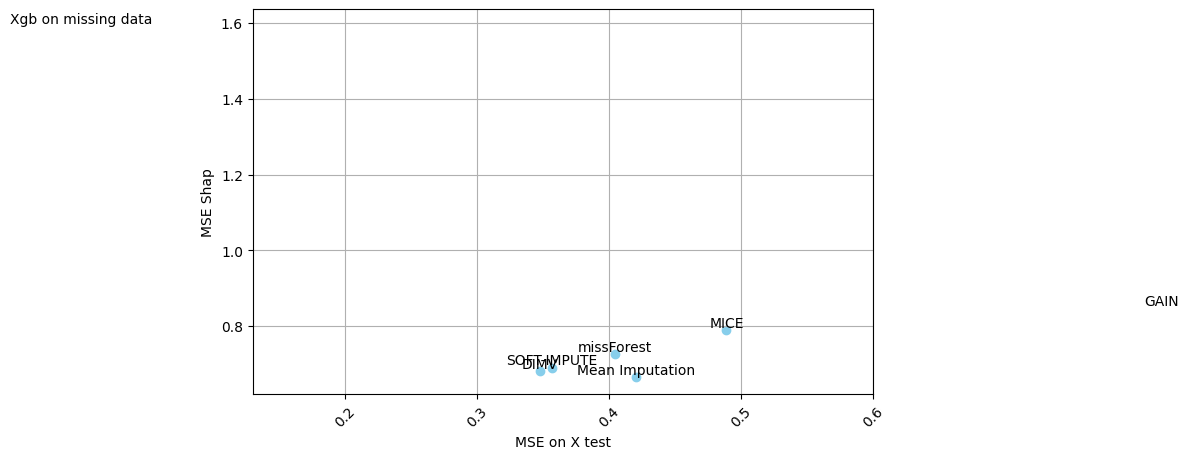

In [12]:
print('imputation MSE versus Shapley MSE')
plt.figure(figsize=(8, 5))
plt.scatter(dfplot['MSE on X test'],dfplot['MSE Shap'], color='skyblue')
for i, row in dfplot.iterrows():
    plt.text(row['MSE on X test'],row['MSE Shap'], row.name, ha='center', va='bottom')
plt.ylabel('MSE Shap')
plt.xlabel('MSE on X test')
plt.xlim(0.130, 0.6)
plt.xticks(rotation=45)
plt.grid(True)  # Adding grid for better visualization
plt.savefig('results/'+ ouput_name+'imputation_mse_vs_shap_mse'+'.png',bbox_inches='tight')
plt.show()

beeswarm plot for class 1


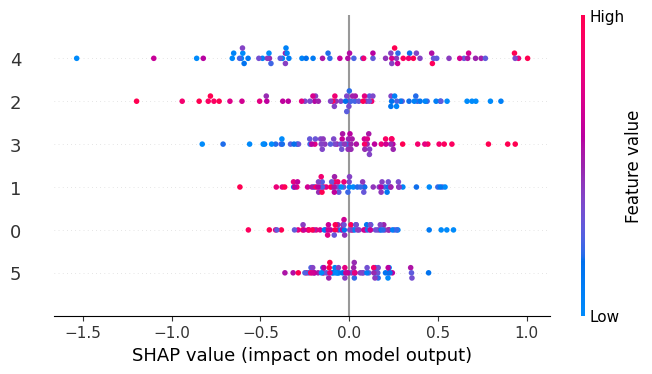

In [13]:
import matplotlib.pyplot as plt
import shap

plt.figure()
plt.rcParams.update({'font.size': 20})  # Adjust font size globally
print('beeswarm plot for class 1')
shap.plots.beeswarm(shap_values_ori, max_display=10, show=False)
plt.savefig('results/' + ouput_name + 'beeswarm' + 'ori' + '.png', bbox_inches='tight')
plt.show()